In [1]:
import re

client_ip = "192.168.0.66"

with open("packets.dat", "r") as infile, open("lab05-timeseq.dat", "w") as outfile:
    for line in infile:
        tokens = line.split()
        if len(tokens) < 3:
            continue

        # 1. Remove packets sent from the client to the server.
        # The source field (tokens[2]) starts with the client IP if the packet is from the client.
        if tokens[2].startswith(client_ip):
            continue

        # 2. Remove handshake packets.
        # Handshake packets typically include SYN or FIN in the Flags field.
        # We can use a regex to filter out any line with "Flags [S" (SYN/SYN-ACK) or "Flags [F" (FIN/FIN-ACK).
        if re.search(r'Flags \[[SF]', line):
            continue

        # 3. Remove packets that do not contain data.
        # We expect data-carrying packets to include a sequence range, e.g., "seq 1:1389".
        # If we do not find such a pattern, we skip the line.
        match_seq = re.search(r'seq\s+\d+:(\d+)', line)
        if not match_seq:
            continue

        # Extract the timestamp (first token) and the last sequence number from the matched sequence range.
        timestamp = tokens[0]
        last_seq = match_seq.group(1)

        outfile.write(f"{timestamp} {last_seq}\n")



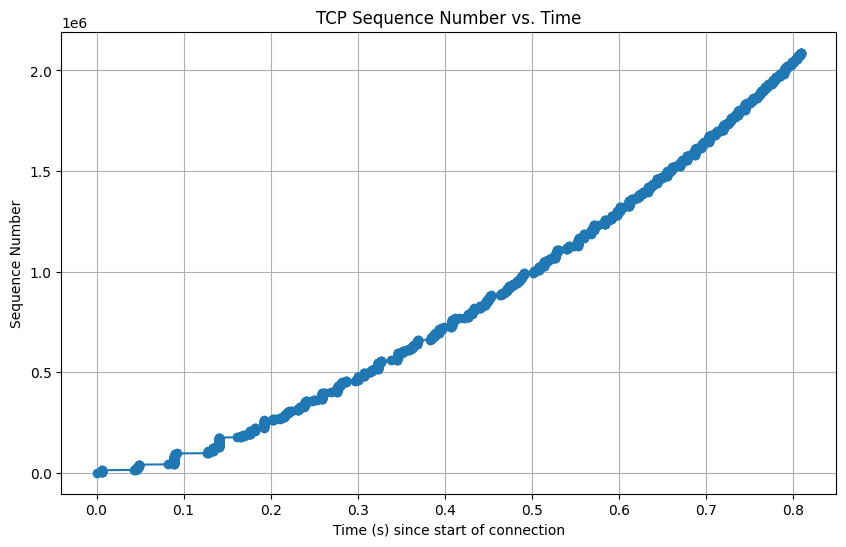

In [3]:
import matplotlib.pyplot as plt
import datetime

# Lists to hold the relative timestamps (in seconds) and sequence numbers
relative_timestamps = []
seq_numbers = []

# Read the processed file
with open("lab05-timeseq.dat", "r") as f:
    lines = f.readlines()

# Function to convert a timestamp string to seconds since midnight
def timestamp_to_seconds(ts_str):
    # Parse using the format HH:MM:SS.microseconds
    t = datetime.datetime.strptime(ts_str, "%H:%M:%S.%f")
    return t.hour * 3600 + t.minute * 60 + t.second + t.microsecond / 1e6

# Process each line in the file
start_time = None
for line in lines:
    parts = line.strip().split()
    if len(parts) < 2:
        continue
    ts_str, seq_str = parts[0], parts[1]
    t_seconds = timestamp_to_seconds(ts_str)
    # Set the connection start time to the first timestamp encountered
    if start_time is None:
        start_time = t_seconds
    # Compute time relative to the start of the connection
    relative_time = t_seconds - start_time
    relative_timestamps.append(relative_time)
    seq_numbers.append(int(seq_str))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(relative_timestamps, seq_numbers, marker='o', linestyle='-')
plt.xlabel("Time (s) since start of connection")
plt.ylabel("Sequence Number")
plt.title("TCP Sequence Number vs. Time")
plt.grid(True)
plt.show()


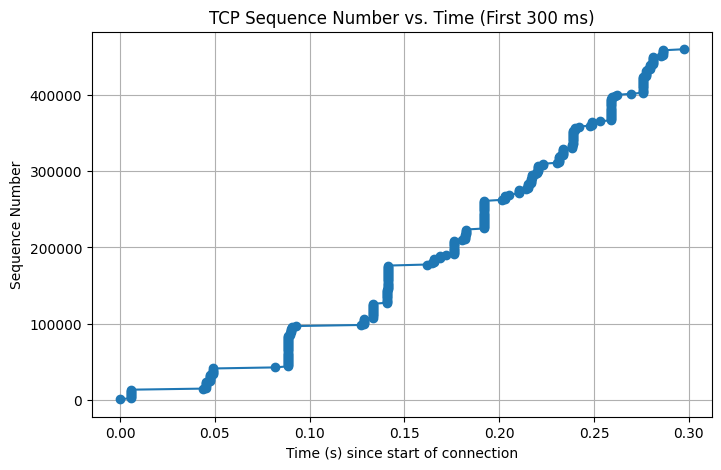

In [4]:
import matplotlib.pyplot as plt
import datetime

def timestamp_to_seconds(ts_str):
    # Parses HH:MM:SS.microseconds into a float (seconds since midnight).
    t = datetime.datetime.strptime(ts_str, "%H:%M:%S.%f")
    return t.hour * 3600 + t.minute * 60 + t.second + t.microsecond / 1e6

timestamps = []
seq_numbers = []

start_time = None

# Read the data from lab05-timeseq.dat
with open("lab05-timeseq.dat", "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) < 2:
            continue
        ts_str, seq_str = parts[0], parts[1]
        t_seconds = timestamp_to_seconds(ts_str)
        
        # Initialize the start_time to the first timestamp in the file
        if start_time is None:
            start_time = t_seconds
        
        # Compute relative time (seconds since start of connection)
        rel_time = t_seconds - start_time
        
        # Keep only data points within the first 300 ms = 0.3 s
        if rel_time <= 0.3:
            timestamps.append(rel_time)
            seq_numbers.append(int(seq_str))

# Plot the filtered data
plt.figure(figsize=(8, 5))
plt.plot(timestamps, seq_numbers, marker='o', linestyle='-')
plt.xlabel("Time (s) since start of connection")
plt.ylabel("Sequence Number")
plt.title("TCP Sequence Number vs. Time (First 300 ms)")
plt.grid(True)
plt.show()
